# MS_2

In [167]:
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from pandas import DataFrame
from IPython.display import display
import numpy as np
pd.options.display.max_columns = None
pd.options.display.max_rows = 200
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab
from sklearn.svm import SVR
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from pylab import *
matplotlib.style.use('ggplot')

In [168]:
admissions=pd.read_csv('MAIN_DF_9.csv')
admissions=admissions.drop(['Unnamed: 0'], axis=1)
admissions=admissions.reset_index(drop=True)
print(admissions.shape)
print('unique SUBJECT_ID:', admissions.SUBJECT_ID.nunique())
print('unique HADM_ID   :', admissions.HADM_ID.nunique())
print('unique ICUSTAY_ID:', admissions.ICUSTAY_ID.nunique())
admissions.head()

(23055, 75)
unique SUBJECT_ID: 17469
unique HADM_ID   : 21650
unique ICUSTAY_ID: 23055


,SUBJECT_ID,HADM_ID,ICUSTAY_ID,GENDER,AGE_AD,TYPE_AD,ETHNICITY,LOS,BMI,I_VEN,NI_VEN,ALBUMIN,BUN,CREATININE,GLUCOSE,HTOCRIT,LACTIC,PCO2A,PHA,PHD,PLATELETC,PO2A,SAO2,SODIUM,TBILIRUBIN,WBC,FIO2,RR,SPO2,ABPD,ABPM,ABPS,HR,NBPD,NBPM,NBPS,TEMP,PrevDays,INSMcaid,INSMcare,INSPvate,FCU_CCU,FCU_CSRU,FCU_MICU,FCU_SICU,FCU_TSICU,GCS_E_None,GCS_ESpon,GCS_EPain,GCS_ESpch,GCS_MAbFl,GCS_MAbex,GCS_MFlwd,GCS_MLoPa,GCS_MNore,GCS_MObCo,GCS_VConf,GCS_VInWo,GCS_VInso,GCS_VNORe,GCS_VNRET,GCS_VOrie,S_TEMP_Cold,S_TEMP_Cool,S_TEMP_Hot,S_TEMP_Warm,FW12,FW14,FW15,FW23,FW33,FW50,FW52,FW57,FW7
0,23,124321,234044,1,75.26000,1,1,1.1862,21.7,0,0,NaN,14.0,0.6,136.0,36.9,NaN,NaN,NaN,NaN,208.0,NaN,NaN,144.0,NaN,14.8,NaN,14.0,100.0,74.0,86.0,181.0,77.0,45.0,50.0,67.0,35.4,2.67,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,34,144319,290505,1,90.89934,1,1,1.5824,27.4,0,0,NaN,36.0,1.6,116.0,35.9,NaN,NaN,NaN,NaN,343.0,NaN,NaN,139.0,NaN,7.1,60.0,14.0,98.0,NaN,NaN,NaN,72.0,66.0,78.0,112.0,36.1,0.00,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,36,165660,241249,1,72.73000,0,1,4.3483,32.7,1,0,2.8,19.0,0.9,126.0,36.3,1.0,60.0,7.29,NaN,174.0,58.0,94.0,139.0,0.6,15.3,100.0,20.0,91.0,NaN,NaN,NaN,94.0,72.0,84.0,122.0,37.4,1.81,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
3,85,112077,291697,1,76.85000,1,1,1.9909,31.8,0,0,NaN,17.0,1.4,114.0,26.4,NaN,NaN,NaN,NaN,24.0,NaN,NaN,137.0,NaN,8.3,NaN,39.0,99.0,NaN,NaN,NaN,136.0,87.0,99.0,166.0,37.0,0.00,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
4,107,182383,252542,1,69.66000,1,0,1.0806,31.3,0,0,NaN,36.0,5.8,125.0,40.3,NaN,NaN,NaN,NaN,303.0,NaN,NaN,139.0,NaN,14.2,NaN,19.0,97.0,NaN,NaN,NaN,64.0,67.0,88.0,155.0,36.7,0.00,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [169]:
admissions['LOS_C']=np.where((admissions['LOS']>0)&(admissions['LOS']<1), '0-1',
                              np.where((admissions['LOS']>=1)&(admissions['LOS']<2), '1-2',
                                  np.where((admissions['LOS']>=2)&(admissions['LOS']<4), '2-4',
                                          np.where((admissions['LOS']>=4)&(admissions['LOS']<6), '4-6','>6'))))
admissions['LOS_C'].value_counts()

1-2    7883
2-4    6156
0-1    3873
>6     2957
4-6    2186
Name: LOS_C, dtype: int64

In [170]:
admissions['LOS_C']=np.where(admissions['LOS_C']=='0-1', 1,
                              np.where(admissions['LOS_C']=='1-2', 1,
                                  np.where(admissions['LOS_C']=='2-4', 1,
                                          np.where(admissions['LOS_C']=='4-6', 0,0))))
admissions['LOS_C'].value_counts()

1    17912
0     5143
Name: LOS_C, dtype: int64

In [171]:
admissions['LOS_C'].value_counts()[1]/admissions['LOS_C'].value_counts().sum()

0.77692474517458254

In [172]:
admissions=admissions.drop(['LOS'], axis=1)
admissions.shape

(23055, 75)

In [173]:
admissions.isnull().sum().sort_values(ascending=False)[:14]

SAO2          17081
ALBUMIN       14559
PHD           14115
ABPM          13737
ABPS          13731
ABPD          13712
TBILIRUBIN    12842
PCO2A         11549
PO2A          11491
PHA           11479
FIO2          10948
LACTIC        10837
SPO2              0
HR                0
dtype: int64

In [174]:
admissions['PO2A'].groupby(admissions['GENDER']).mean()

GENDER
0    190.981058
1    207.025496
Name: PO2A, dtype: float64

Better fill missing values by gender

In [175]:
admissions['SAO2'] = admissions['SAO2'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['ALBUMIN'] = admissions['ALBUMIN'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['PHD'] = admissions['PHD'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['ABPM'] = admissions['ABPM'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['ABPS'] = admissions['ABPS'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['ABPD'] = admissions['ABPD'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['TBILIRUBIN'] = admissions['TBILIRUBIN'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['PCO2A'] = admissions['PCO2A'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['PO2A'] = admissions['PO2A'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['PHA'] = admissions['PHA'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['FIO2'] = admissions['FIO2'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))
admissions['LACTIC'] = admissions['LACTIC'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))

In [176]:
#admissions=admissions.drop(['SAO2', 'ABPD', 'ABPS'], axis=1)
#admissions.shape

In [177]:
admissions=admissions.drop(['SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID'], axis=1)
admissions.shape

(23055, 72)

In [178]:
admissions.isnull().sum().sum()

0

In [179]:
data_final_vars=admissions.columns.values.tolist()
y=['LOS_C']
x=[i for i in data_final_vars if i not in y]
data_final=admissions
data_final.shape
X=data_final[x]
y=data_final[y]

In [180]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
#y = sc.transform(y)

In [138]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
#print(result.summary())

         Current function value: 0.606915
         Iterations: 35


In [139]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [140]:
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [141]:
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
model.score(X_test, y_test)

0.81465953448026596

In [142]:
standardizer = StandardScaler()
logit = LogisticRegression()
pipeline = make_pipeline(standardizer, logit)
# Create k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)
# Do k-fold cross-validation
cv_results = cross_val_score(pipeline,X,y,cv=kf,
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores
cv_results.mean()

0.81331514694289919

In [143]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
actr=np.round(100*logreg.score(X_train, y_train),4)
acte=np.round(100*logreg.score(X_test, y_test),4)
print('Accuracy of logistic regression classifier on train set:', actr)
print('Accuracy of logistic regression classifier on test set:', acte)

Accuracy of logistic regression classifier on train set: 81.5652
Accuracy of logistic regression classifier on test set: 81.466


In [144]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 575  974]
 [ 308 5060]]


In [145]:
cm = metrics.confusion_matrix(y_test, y_pred)
score = np.round(logreg.score(X_test, y_test)*100,4)

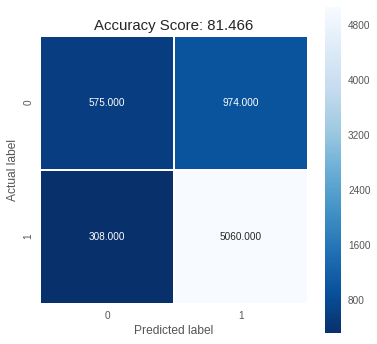

In [146]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()

In [147]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

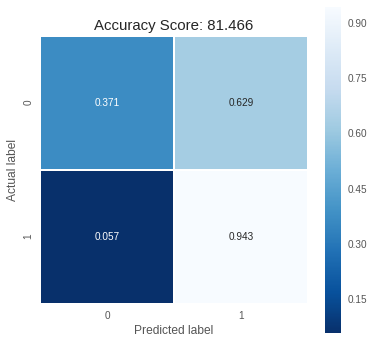

In [148]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()

In [149]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.65      0.37      0.47      1549
          1       0.84      0.94      0.89      5368

avg / total       0.80      0.81      0.79      6917



In [150]:
logreg.predict(X_test)

array([1, 1, 1, ..., 1, 0, 1])

In [151]:
logreg.predict_proba(X_test)

array([[ 0.1516475 ,  0.8483525 ],
       [ 0.09909607,  0.90090393],
       [ 0.09816667,  0.90183333],
       ..., 
       [ 0.03741   ,  0.96259   ],
       [ 0.52708404,  0.47291596],
       [ 0.05183088,  0.94816912]])

In [152]:
logreg.predict_proba(X_test)[::,1]

array([ 0.8483525 ,  0.90090393,  0.90183333, ...,  0.96259   ,
        0.47291596,  0.94816912])

# Support Vector Machines

In [65]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear', class_weight='balanced', probability=True)  
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [66]:
y_pred = svclassifier.predict(X_test)
#y_pred = svclassifier.predict_proba(X_test)

In [67]:
svactr=np.round(100*svclassifier.score(X_train, y_train),4)
svacte=np.round(100*svclassifier.score(X_test, y_test),4)
print('Accuracy of SVM classifier on train set:', svactr)
print('Accuracy of SVM classifier on test set:', svacte)

Accuracy of SVM classifier on train set: 77.8535
Accuracy of SVM classifier on test set: 78.2565


In [68]:
metrics.accuracy_score(y_test, y_pred)

0.78256469567731679

# Random Forest

In [153]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=10, random_state = 42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
ttac=np.round(metrics.accuracy_score(y_test, y_pred)*100,4)
trac=np.round(clf.score(X_train, y_train)*100,4)
print("Accuracy test:",ttac)
print("Accuracy train:",trac)

Accuracy test: 81.9286
Accuracy train: 99.2936


In [154]:
clf1=RandomForestClassifier(n_estimators=100, random_state = 42)
clf1.fit(X_train,y_train)
y_pred=clf1.predict(X_test)
print("Accuracy test:",np.round(metrics.accuracy_score(y_test, y_pred)*100,4))
print("Accuracy train:",np.round(clf.score(X_train, y_train)*100,4))

Accuracy test: 84.502
Accuracy train: 99.2936


Put more trees is not the solution! OVERFITTING

In [155]:
RFC = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(RFC, X, y, cv = 10, scoring='accuracy')
scores.mean()

0.84580453827970603

In [156]:
RFC.fit(X_train,y_train)
y_pred=RFC.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.84429666040190832

In [157]:
RFC.score(X_train, y_train)

1.0

In [158]:
feature_imp = pd.Series(RFC.feature_importances_,index=x).sort_values(ascending=False)[:50]

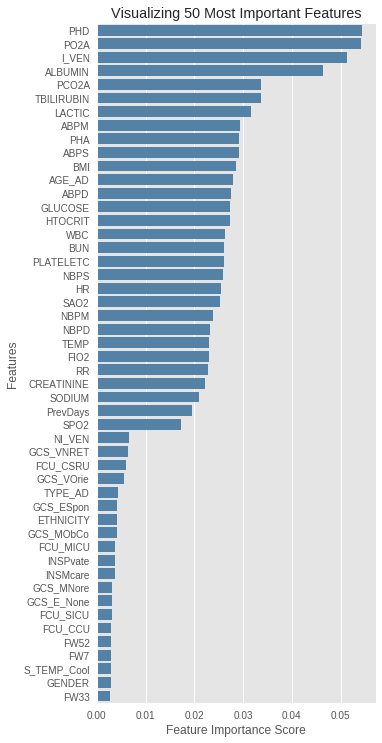

In [159]:
%matplotlib inline
plt.figure(figsize=(5,12.5))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index, color='steelblue')
#sns.barplot(x=importance.Importance, y=importance.index,ci='sd', color='steelblue')
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing 50 Most Important Features')
plt.legend()
plt.show()

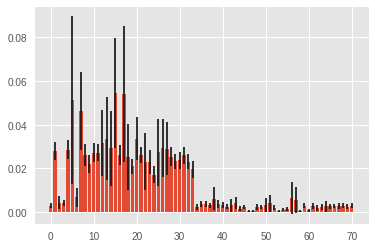

In [160]:
importance = RFC.feature_importances_
importance = pd.DataFrame(importance, index=x, columns=["Importance"])
importance["Std"] = np.std([tree.feature_importances_
                            for tree in RFC.estimators_], axis=0)
x = range(importance.shape[0])
y = importance.ix[:, 0]
yerr = importance.ix[:, 1]
plt.bar(x, y, yerr=yerr, align="center")
plt.show()

In [161]:
importance=importance.sort_values(by='Importance', ascending=False)

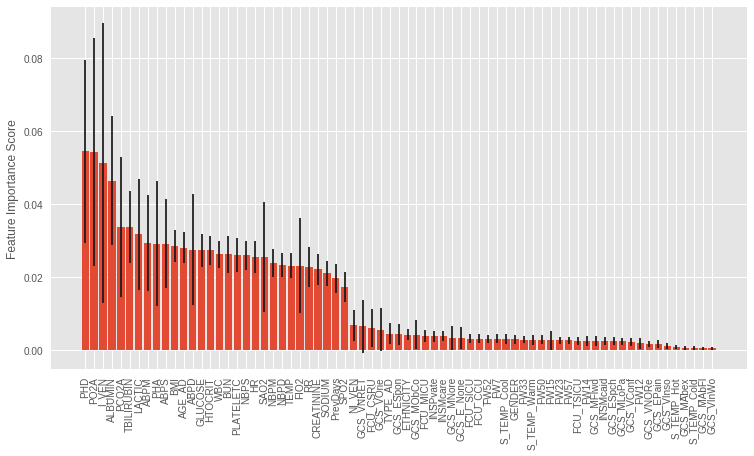

In [162]:
plt.figure(figsize=(12.5,8))
x = range(importance.shape[0])
y = importance.ix[:, 0]
yerr = importance.ix[:, 1]

plt.bar(x, y, yerr=yerr, align="center")
LABELS = importance.index

plt.xticks(x, LABELS, rotation='vertical')
plt.ylabel('Feature Importance Score')
#plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.25)
plt.savefig('12features.eps', format='eps', dpi=1200)
plt.show()

In [181]:
#from sklearn import svm
#clf = svm.SVC(kernel='linear', C=10).fit(X_train, y_train)
#clf.score(X_test, y_test)  
#clf.score(X_train, y_train)

# Random Forest Classifier

In [182]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(RFC, X, y, cv=10, method='predict_proba')
predicted1 = cross_val_predict(RFC, X, y, cv=10)
acrff=np.round(metrics.accuracy_score(y, predicted1)*100,4) 

# Log Reg

In [183]:
logreg = LogisticRegression()
pp = cross_val_predict(logreg, X, y, cv=10, method='predict_proba')
pp1= cross_val_predict(logreg, X, y, cv=10)
mmmm=np.round(metrics.accuracy_score(y, pp1)*100,4)

In [184]:
#from sklearn import svm
#clf = svm.SVC(kernel='linear', C=10, probability=True, class_weight='balanced') 
#kk = cross_val_predict(clf, X, y, cv=10, method='predict_proba')
#kk1= cross_val_predict(clf, X, y, cv=10)
#kkkk=np.round(metrics.accuracy_score(y, kk1)*100,4)

# Tune Random Forest

We need to tune! I use a regression that we are going to convert via a cut in the probability prediction

In [82]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [83]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 300, num = 2)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 300]}


In [84]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True 
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True 
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True 
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True, total=   5.9s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True, total=   7.0s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False 


[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False, total=  12.7s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.8min


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False, total=  13.7s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=  21.0s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=  20.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, total=   8.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=300, mi

[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False, total= 2.4min
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False, total= 2.5min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False, total= 2.6min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=True, total=  59.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=True 
[CV]  n_estimators=300, min_

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=  13.5s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True, total=   7.0s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True, total=   7.2s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True, total=   7.0s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False 
[CV]  n_estimators=300, min

[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, total= 1.5min
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, total= 1.6min
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, total= 1.5min
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=110, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True, total= 1.4min
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=110, bootstrap=True 
[CV]  n_estimators=300, min_sample

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 29.9min


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=True, total=   7.5s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=True, total=   8.1s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=True, total=   7.8s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True, total=  52.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=300, min_

[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True, total= 1.5min
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True, total=  11.1s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True, total=  10.7s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True, total=  10.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=200, min_s

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False, total= 1.3min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False, total= 1.5min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False, total= 1.6min
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False, total= 1.7min
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False, total=  11.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False, total=  11.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True, total= 1.5min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True, total= 1.4min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=300, min_sam

[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=  11.8s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True, total= 1.0min
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True, total= 1.1min
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True, total= 1.1min
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=200, min_samp

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 53.8min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [85]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 300}

In [86]:
best_random = rf_random.best_estimator_
y_pred = best_random.predict(X_test)
y_pred = (y_pred>0.5)

In [87]:
bac=np.round(metrics.accuracy_score(y_test, y_pred)*100,4)
bactr=np.round(best_random.score(X_train, y_train)*100,4)
print("Accuracy test:",bac) #rf_random.score(X_test, y_test)
print("Accuracy train:",bactr)

Accuracy test: 84.7911
Accuracy train: 83.3876


That's not bad!

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [80],
    'max_features': ['sqrt'],
    'min_samples_leaf': [2,4],
    'min_samples_split': [5, 10],
    'n_estimators': [300]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, verbose = 2, n_jobs = -1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300 
[CV] bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300 
[CV] bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300 
[CV] bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300, total=  16.4s
[CV] bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300, total=  16.4s
[CV] bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   58.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   58.6s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [False], 'max_depth': [80], 'max_features': ['sqrt'], 'min_samples_leaf': [2, 4], 'min_samples_split': [5, 10], 'n_estimators': [300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [102]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 300}

In [127]:
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)
y_pred = (y_pred>0.5)

In [128]:
fac=np.round(metrics.accuracy_score(y_test, y_pred)*100,4)
factr=np.round(best_grid.score(X_train, y_train)*100,4)
print("Accuracy test:",fac) #rf_random.score(X_test, y_test)
print("Accuracy train:",factr)

Accuracy test: 93.4075
Accuracy train: 66.6844


In [ ]:
feature_imp = pd.Series(RFC.feature_importances_,index=x.columns).sort_values(ascending=False)[:50]

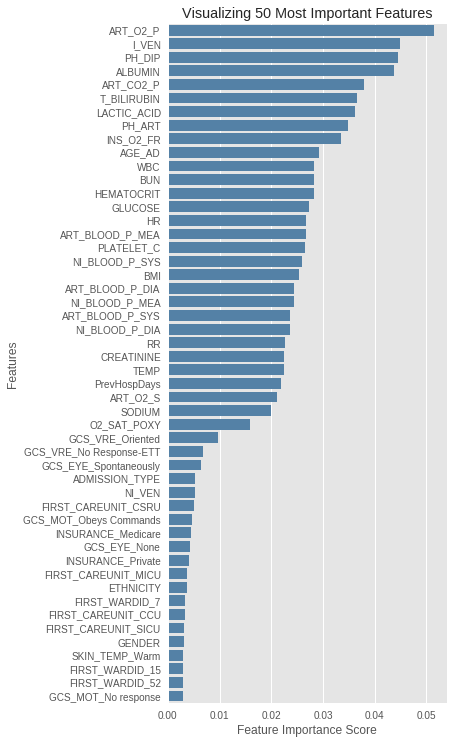

In [168]:
%matplotlib inline
plt.figure(figsize=(5,12.5))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index, color='steelblue')
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing 50 Most Important Features')
plt.legend()
plt.show()

# Neural Networks

In [185]:
X_test.shape

(6917, 71)

In [186]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, input_dim=71, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          epochs=25,
          batch_size=128)
score1 = model.evaluate(X_test, y_test, batch_size=128)
score2 = model.evaluate(X_train, y_train, batch_size=128)
score1 = np.round(score1[1]*100,4)
score2 = np.round(score2[1]*100,4)

Using TensorFlow backend.


Epoch 1/25
16138/16138 [==============================] - 0s 22us/step - loss: 0.5997 - acc: 0.7315
Epoch 2/25
16138/16138 [==============================] - 0s 13us/step - loss: 0.5051 - acc: 0.7754
Epoch 3/25
16138/16138 [==============================] - 0s 13us/step - loss: 0.4722 - acc: 0.7878
Epoch 4/25
16138/16138 [==============================] - 0s 17us/step - loss: 0.4541 - acc: 0.7980
Epoch 5/25
16138/16138 [==============================] - 0s 17us/step - loss: 0.4447 - acc: 0.8015
Epoch 6/25
16138/16138 [==============================] - 0s 16us/step - loss: 0.4406 - acc: 0.8058
Epoch 7/25
16138/16138 [==============================] - 0s 15us/step - loss: 0.4308 - acc: 0.8072
Epoch 8/25
16138/16138 [==============================] - 0s 18us/step - loss: 0.4280 - acc: 0.8114
Epoch 9/25
16138/16138 [==============================] - 0s 16us/step - loss: 0.4271 - acc: 0.8113
Epoch 10/25
16138/16138 [==============================] - 0s 17us/step - loss: 0.4228 - acc: 0.8157

In [187]:
print('test :', score1)
print('train:', score2)

test : 82.8683
train: 84.2484


In [188]:
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
np.random.seed(0)

In [189]:
def create_network():
    
    model = Sequential()
    model.add(Dense(64, input_dim=71, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
    
    return model

In [190]:
neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=25, 
                                 batch_size=100, 
                                 verbose=0)

In [191]:
np.mean(cross_val_score(neural_network, X, y, cv=10))

0.82958124848041859

In [192]:
nn = cross_val_predict(neural_network, X, y, cv=10, method='predict_proba')
nn1 = cross_val_predict(neural_network, X, y, cv=10)
nnnn=np.round(metrics.accuracy_score(y, nn1)*100,4)

# KNeighbors Classifier

In [193]:
from sklearn.neighbors import KNeighborsClassifier

In [194]:
hh=[]
for i in range (1,51):
    kn=KNeighborsClassifier(n_neighbors=i)
    kkk = cross_val_predict(kn, X, y, cv=10, method='predict_proba')
    kkk1= cross_val_predict(kn, X, y, cv=10)
    kkkk=np.round(metrics.accuracy_score(y, kkk1)*100,4)
    hh.append(kkkk)

In [195]:
yy=list(range(1,51))

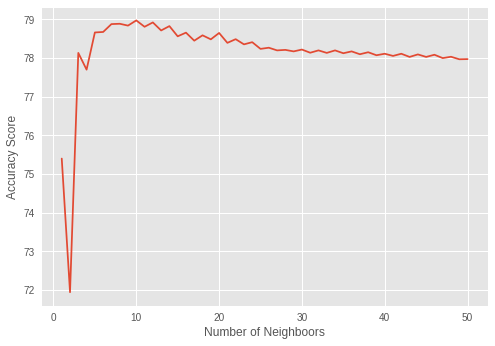

In [199]:
plt.plot(yy,hh)
plt.xlabel('Number of Neighboors')
plt.ylabel('Accuracy Score')
#plt.title()
plt.savefig('12neigh.eps', format='eps', dpi=1200)
plt.show()

In [197]:
kn=KNeighborsClassifier(n_neighbors=10)
kkk = cross_val_predict(kn, X, y, cv=10, method='predict_proba')
kkk1= cross_val_predict(kn, X, y, cv=10)
kkkk=np.round(metrics.accuracy_score(y, kkk1)*100,4)

# Results

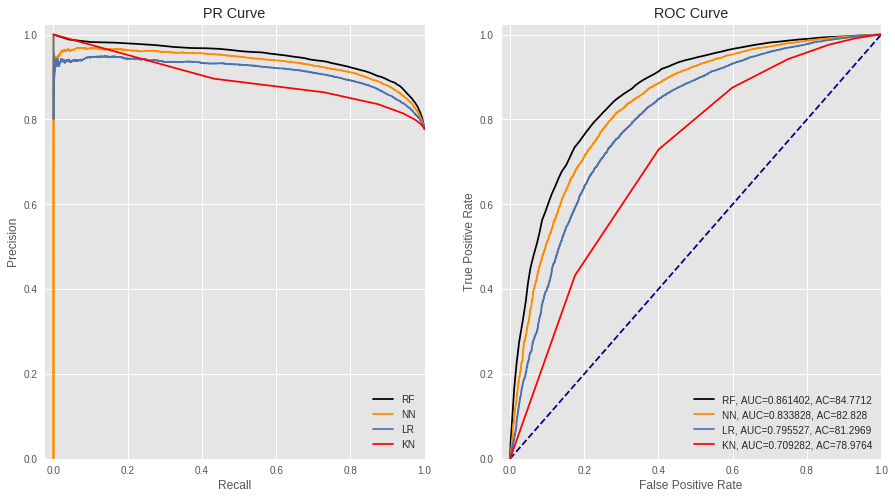

In [200]:
from sklearn.metrics import classification_report,confusion_matrix,auc,precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.025,1])
ax1.set_ylim([0,1.025])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve')

ax2 = fig.add_subplot(1,2,2)
ax2.plot([0, 1], [0, 1], color='navy', linestyle='--')
ax2.set_xlim([-0.025,1])
ax2.set_ylim([0,1.025])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')

#y_pred_proba=best_grid.predict(X_test)
y_pred_proba=predicted[::,1]
fpr, tpr, _ = metrics.roc_curve(y, y_pred_proba)
p,r,_ = precision_recall_curve(y,y_pred_proba)
auc = np.round(metrics.roc_auc_score(y, y_pred_proba),6)
ax2.plot(fpr,tpr,label="RF, AUC="+str(auc)+", AC="+str(acrff),color='black')
ax1.plot(r,p,label='RF',color='black')
#plt.legend(loc=4)

#y_pred_proba = model.predict_proba(X_test)
y_pred_proba=nn[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
p,r,_ = precision_recall_curve(y,y_pred_proba)
auc = np.round(metrics.roc_auc_score(y, y_pred_proba),6)
ax2.plot(fpr,tpr,label="NN, AUC="+str(auc)+", AC="+str(nnnn),color='darkorange')
ax1.plot(r,p,label='NN',color='darkorange')
#ax2.legend(loc=4)

for w,k in zip([1],'bgrcmykw'):
    #lr_model = LogisticRegression(class_weight={0:1,1:w})
    #lr_model.fit(X_train,y_train)
    #pred_prob = lr_model.predict_proba(X_test)[:,1]
    #pred_prob = logreg.predict_proba(X_test)[::,1]
    pred_prob=pp[::,1]
    p,r,_ = precision_recall_curve(y,pred_prob)
    tpr,fpr,_ = roc_curve(y,pred_prob)
    auc = np.round(metrics.roc_auc_score(y, pred_prob),6)
    ax1.plot(r,p,c=k,label='LR')
    ax2.plot(tpr,fpr,c=k,label='LR, AUC='+str(auc)+", AC="+str(mmmm))

#y_pred_proba=svclassifier.predict_proba(X_test)[:,1]
y_pred_proba=kkk[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
p,r,_ = precision_recall_curve(y,y_pred_proba)
auc = np.round(metrics.roc_auc_score(y, y_pred_proba),6)
ax2.plot(fpr,tpr,label="KN, AUC="+str(auc)+", AC="+str(kkkk),color='red')
ax1.plot(r,p,label='KN',color='red')
#plt.legend(loc=4)

ax1.legend(loc='lower right')    
ax2.legend(loc='lower right')
plt.savefig('12roc.eps', format='eps', dpi=1200)
plt.show()